# Chapter 7: Comparing Means and Proportions of Two Populations 

### Two-sampel T-test

/var/folders/b8/hq7p21n142n321y966q8j1600000gn/T/ipykernel_9650/2564743101.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([sample_A, sample_B], labels=["School A", "School B"], patch_artist=True, boxprops=dict(facecolor='skyblue', color='blue'), whiskerprops=dict(color='blue'), capprops=dict(color='blue'))


Text(0.5, 1.0, 'The Boxplot for the Heights of Two Schools with 25 samples in Each School')

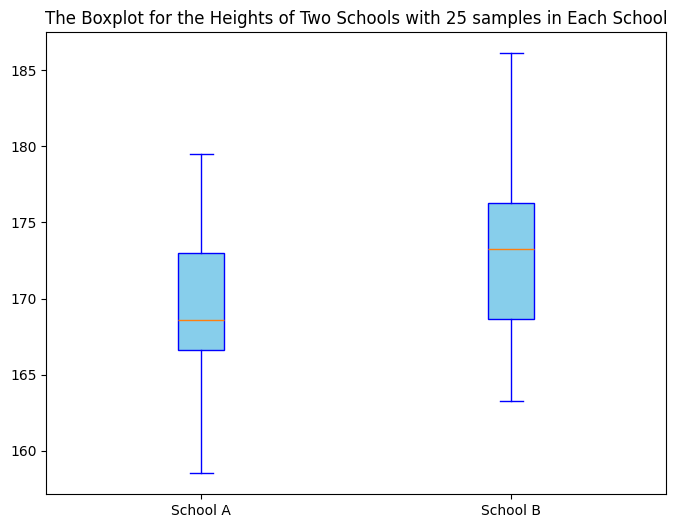

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
np.random.seed(42)
n_A, n_B = 25, 25  # Sample sizes < 30
mu_A, mu_B = 170, 175  # Assume different population means
sigma_A, sigma_B = 6, 6  # Assume equal variances
sample_A = np.random.normal(mu_A, sigma_A, n_A)
sample_B = np.random.normal(mu_B, sigma_B, n_B)
plt.figure(figsize=(8, 6))
plt.boxplot([sample_A, sample_B], labels=["School A", "School B"], patch_artist=True, boxprops=dict(facecolor='skyblue', color='blue'), whiskerprops=dict(color='blue'), capprops=dict(color='blue'))
plt.title("The Boxplot for the Heights of Two Schools with 25 samples in Each School" )


In [2]:
t_stat, p_value = stats.ttest_ind(sample_A, sample_B, equal_var=True)
df = n_A + n_B - 2  # Degrees of freedom
x = np.linspace(-4, 4, 1000)
t_dist = stats.t.pdf(x, df)

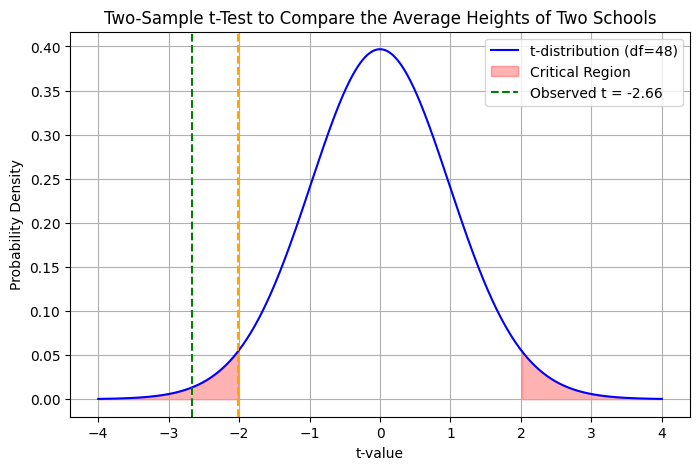

In [3]:
plt.figure(figsize=(8, 5))
plt.plot(x, t_dist, label=f"t-distribution (df={df})", color='blue')
  # Critical t-value for 95% confidence level (two-tailed test)
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha/2, df)
  # Shade critical regions
plt.fill_between(x, t_dist, where=(x >= t_critical), color='red', alpha=0.3, label='Critical Region')
plt.fill_between(x, t_dist, where=(x <= -t_critical), color='red', alpha=0.3)
plt.axvline(t_stat, color='green', linestyle='--', label=f'Observed t = {t_stat:.2f}')
plt.axvline(-t_critical, color='orange', linestyle='--')
plt.title("Two-Sample t-Test to Compare the Average Heights of Two Schools")
plt.xlabel("t-value")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()
plt.show()

In [4]:
print(f"t-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis. Heights are significantly different.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant difference.")


t-statistic: -2.66, p-value: 0.0105
Conclusion: Reject the null hypothesis. Heights are significantly different.


### One-Tailed and Two-Tailed z-Test for Two Samples

In [5]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
np.random.seed(42)
n_A, n_B = 50, 50  # Sample sizes
mu_A, mu_B = 170, 175  # Assume different population means
sigma_A, sigma_B = 6, 6  # Assume known and equal variances
sample_A = np.random.normal(mu_A, sigma_A, n_A)
sample_B = np.random.normal(mu_B, sigma_B, n_B)

In [6]:
mean_A, mean_B = np.mean(sample_A), np.mean(sample_B)
se_A, se_B = sigma_A / np.sqrt(n_A), sigma_B / np.sqrt(n_B)

In [7]:
z_stat_one_tailed = (mean_A - mean_B) / np.sqrt(se_A**2 + se_B**2)
p_value_one_tailed = stats.norm.cdf(z_stat_one_tailed)  
z_stat_two_tailed = (mean_A - mean_B) / np.sqrt(se_A**2 + se_B**2)
p_value_two_tailed = 2 * (1 - stats.norm.cdf(abs(z_stat_two_tailed))) 

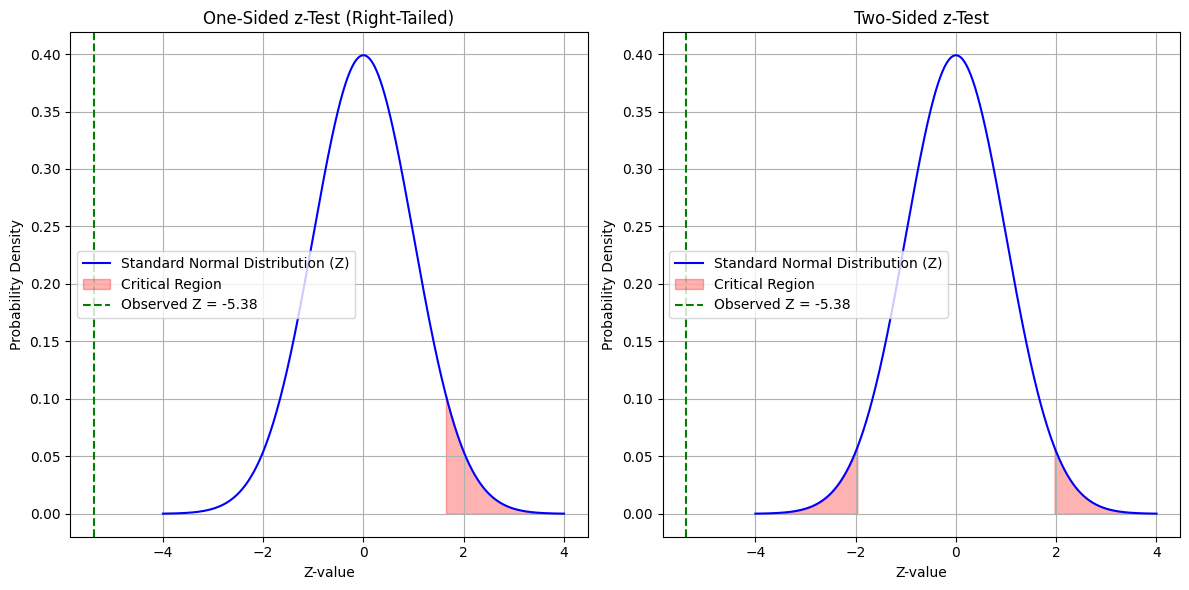

In [8]:
x = np.linspace(-4, 4, 1000)
z_dist = stats.norm.pdf(x)
plt.figure(figsize=(12, 6))
  # One-tailed plot (right-tail)
plt.subplot(1, 2, 1)
plt.plot(x, z_dist, label="Standard Normal Distribution (Z)", color="blue")
z_critical_one_tailed = stats.norm.ppf(0.95)  # Right-tailed critical value at alpha = 0.05
plt.fill_between(x, z_dist, where=(x >= z_critical_one_tailed), color="red", alpha=0.3, label="Critical Region")
plt.axvline(z_stat_one_tailed, color="green", linestyle="--", label=f"Observed Z = {z_stat_one_tailed:.2f}")
plt.title("One-Sided z-Test (Right-Tailed)")
plt.xlabel("Z-value")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()
  # Two-tailed plot
plt.subplot(1, 2, 2)
plt.plot(x, z_dist, label="Standard Normal Distribution (Z)", color="blue")
z_critical_two_tailed = stats.norm.ppf(0.975)  
plt.fill_between(x, z_dist, where=(x >= z_critical_two_tailed), color="red", alpha=0.3, label="Critical Region")
plt.fill_between(x, z_dist, where=(x <= -z_critical_two_tailed), color="red", alpha=0.3)
plt.axvline(z_stat_two_tailed, color="green", linestyle="--", label=f"Observed Z = {z_stat_two_tailed:.2f}")
plt.title("Two-Sided z-Test")
plt.xlabel("Z-value")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [9]:
print(f"One-Tailed Z-statistic: {z_stat_one_tailed:.2f}, p-value: {p_value_one_tailed:.4f}")
if p_value_one_tailed < 0.05:
  print("Conclusion for One-Tailed: Reject the null hypothesis. A is significantly less than B.")
else:
  print("Conclusion for One-Tailed: Fail to reject the null hypothesis. No significant difference.")
print(f"Two-Tailed Z-statistic: {z_stat_two_tailed:.2f}, p-value: {p_value_two_tailed:.4f}")
if p_value_two_tailed < 0.05:
  print("Conclusion for Two-Tailed: Reject the null hypothesis. The means are significantly different.")
else:
  print("Conclusion for Two-Tailed: Fail to reject the null hypothesis. No significant difference.")


One-Tailed Z-statistic: -5.38, p-value: 0.0000
Conclusion for One-Tailed: Reject the null hypothesis. A is significantly less than B.
Two-Tailed Z-statistic: -5.38, p-value: 0.0000
Conclusion for Two-Tailed: Reject the null hypothesis. The means are significantly different.


### Paired t-test

#### Example 1

In [11]:
import scipy.stats as stats
before = [70, 60, 80, 72, 65, 85, 90, 78, 68, 74]
after = [75, 65, 85, 78, 70, 88, 92, 80, 72, 79]
t_stat, p_value = stats.ttest_rel(before, after)
print("t-statistic:", t_stat)
print("P-value:", p_value)
if p_value < 0.05:
  print("Reject the null hypothesis. The study method had a significant impact on test scores.")
else:
  print("Fail to reject the null hypothesis. The study method did not have a significant impact on test scores.")


t-statistic: -9.497607354199554
P-value: 5.4860754472352256e-06
Reject the null hypothesis. The study method had a significant impact on test scores.


#### Example 2

In [12]:
before_height = [15, 12, 20, 18, 25, 10, 30, 22, 16, 28]
after_height = [18, 14, 23, 19, 28, 12, 32, 25, 18, 30]
t_stat, p_value = stats.ttest_rel(before_height, after_height)
print("t-statistic:", t_stat)
print("P-value:", p_value)
if p_value < 0.05:
  print("Reject the null hypothesis. The fertilizer had a significant effect on plant growth.")
else:
  print("Fail to reject the null hypothesis. The fertilizer did not have a significant effect on plant growth.")


t-statistic: -10.775989570313817
P-value: 1.914531651595706e-06
Reject the null hypothesis. The fertilizer had a significant effect on plant growth.
